# Test for the cnn module

Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

The test consists of six model data sets.

First import the module.

In [1]:
import cnn

Other import:

In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

Set how many data points should be generated and a random seed.

In [3]:
np.random.seed(0)
n_samples = 2000

Then we can generate the test sets.

In [4]:
noisy_circles, _ = datasets.make_circles(n_samples=n_samples,
                                         factor=.5,
                                         noise=.05)

noisy_moons, _ = datasets.make_moons(n_samples=n_samples,
                                     noise=.05)

blobs, _ = datasets.make_blobs(n_samples=n_samples,
                            random_state=8)

no_structure = np.random.rand(n_samples, 2)

random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples,
                           random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

varied, _ = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

Set the cluster parameters:

In [5]:
testsets = [
    ('circles', noisy_circles, {'radius_cutoff': 0.5, 'cnn_cutoff': 20,
                     'member_cutoff': 100, 'max_clusters': None}),
    ('moons', noisy_moons, {'radius_cutoff': 0.5, 'cnn_cutoff': 20,
                     'member_cutoff': 1, 'max_clusters': None}),
    ('varied', varied, {'radius_cutoff': 0.28, 'cnn_cutoff': 20,
                     'member_cutoff': 5, 'max_clusters': None}),
    ('aniso', aniso, {'radius_cutoff': 0.29, 'cnn_cutoff': 30,
                     'member_cutoff': 5, 'max_clusters': None}),
    ('blobs', blobs, {'radius_cutoff': 0.4, 'cnn_cutoff': 20,
                     'member_cutoff': 1, 'max_clusters': None}),
    ('None', no_structure, {'radius_cutoff': 0.5, 'cnn_cutoff': 20,
                     'member_cutoff': 1, 'max_clusters': None}),
    ]

And take a look at the sets:

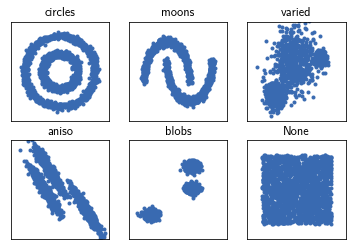

In [6]:
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

for count, (testset_name, testset, *_) in enumerate(testsets):
    testset = StandardScaler().fit_transform(testset)
    axes = Ax[count]
    axes.plot(testset[:, 0], testset[:, 1], '.')
    axes.set_xticks(())
    axes.set_yticks(())
    axes.set_xlim(-2.5, 2.5)
    axes.set_ylim(-2.5, 2.5)
    axes.set_title(f'{testset_name}')

Next we specify the cluster parameters used for each set.

2000
Execution time for call of dist(): 0 hours, 0 minutes, 0.0356 seconds
Execution time for call of cluster(): 0 hours, 0 minutes, 0.3396 seconds
recording: ... 
points               2000
radius_cutoff         0.5
cnn_cutoff             20
member_cutoff         100
max_clusters         None
n_cluster               2
largest               0.5
noise                   0
time             0.339643
dtype: object
2000
Execution time for call of dist(): 0 hours, 0 minutes, 0.0356 seconds
Execution time for call of cluster(): 0 hours, 0 minutes, 0.4401 seconds
recording: ... 
points               2000
radius_cutoff         0.5
cnn_cutoff             20
member_cutoff           1
max_clusters         None
n_cluster               2
largest               0.5
noise                   0
time             0.440094
dtype: object
2000
Execution time for call of dist(): 0 hours, 0 minutes, 0.0264 seconds
Execution time for call of cluster(): 0 hours, 0 minutes, 0.4008 seconds
recording: ... 
points      

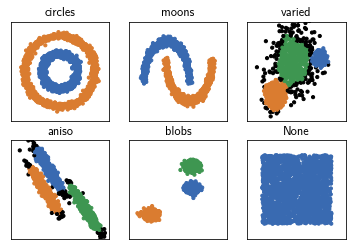

In [7]:
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

for count, (testset_name, testset, params) in enumerate(testsets):
    testset = StandardScaler().fit_transform(testset)
    
    cobj = cnn.CNN(data=testset)
    cobj.dist()
    #cobj.dist_hist()
    cobj.cluster(radius_cutoff=params['radius_cutoff'],
                 cnn_cutoff=params['cnn_cutoff'],
                 member_cutoff=params['member_cutoff'],
                 max_clusters=params['max_clusters'])

    colors = np.array(list(islice(cycle(['#000000', '#396ab1', '#da7c30',
                                         '#3e9651', '#cc2529', '#535154',
                                         '#6b4c9a', '#922428', '#948b3d']),
                                  int(max(cobj.labels) + 1))))

    axes = Ax[count]
    axes.scatter(testset[:, 0], testset[:, 1], s=10, color=colors[cobj.labels])
    axes.set_xticks(())
    axes.set_yticks(())
    axes.set_xlim(-2.5, 2.5)
    axes.set_ylim(-2.5, 2.5)
    axes.set_title(f'{testset_name}')
    
plt.show()
plt.close()